## 1. 引入所需套件
- Pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- jieba: 中文斷詞套件
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [1]:
from datetime import datetime
from collections import Counter

import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

In [2]:
# 設定圖的字體
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 2. 實際應用：以PPT八卦版的文本為例

### 2.1 資料蒐集
此次資料蒐集以雞蛋為主題

In [3]:
df = pd.read_csv('./raw_data/sna_egg_1201_0331.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題\n剛來好市多買雞蛋\n去年買325\n後來漲過一次\n剛才去買變385\n漲幅18%耶...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊\n你看日本的蛋不是更貴（？\nhttps://i.imgur.com/hHW2EwX...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號\n聽說現在雞蛋有點貴\n但如果是克拉克來賣的話應該會實惠很多吧\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday\n\n石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要\n\n記...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1669886550....,[問卦]讓雞蛋也成為護國群山吧！,2022-12-01 17:22:27,Alaba,Gossiping,先前討論過為何准許炒房不准炒蛋\n\n現在蛋價都起來了，接下來是不是就能像當初某部長講的護國...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""koromo1991"",...",114.34.171.176,2022-12-02 01:32:26,ptt
...,...,...,...,...,...,...,...,...,...,...,...
2766,2767,https://www.ptt.cc/bbs/Gossiping/M.1680168538....,[新聞]搶完雞蛋換搶「水」！高雄水情轉橙燈洗,2023-03-30 17:28:55,vntlu,Gossiping,1.媒體來源: TVBS\n\n2.記者署名: 2023/03/30 15:24 記者 林家...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""A80211ab"", ""...",36.228.215.3,2023-03-31 01:35:43,ptt
2767,2768,https://www.ptt.cc/bbs/Gossiping/M.1680174886....,[新聞]泰國進口蛋差價3塊多藍委質疑有貓膩,2023-03-30 19:14:42,JamesSoong,Gossiping,1.媒體來源:\n\n 中國時報\n\n2.記者署名:\n\n ...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ClownT"", ""cm...",39.10.34.50,2023-03-31 01:36:37,ptt
2768,2769,https://www.ptt.cc/bbs/Gossiping/M.1680178759....,[問卦]空軍一號能裝多少蛋,2023-03-30 20:19:15,TAMASABUROU,Gossiping,打gay後\n\n小弟歐羅肥\n\n不知道有沒有人知道空軍一號可以裝載多少雞蛋\n\n從出訪...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""felixden"", ""...",118.165.121.75,2023-03-31 01:37:15,ptt
2769,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,開放進口蛋沒幾天，突然本來雜糧行限制一人一袋的雞蛋，太太\n\n 說老闆今天不限制...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt


### 2.2 資料初步清理
清除內文為空值的文章<br>
透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號，並清除不重要的字如換行、網址

In [4]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')

#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)

#移除內文中的網址
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18%耶太扯了吧連吃的營養健...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴（？,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要記者楊惠琪／台北報...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1669886550....,[問卦]讓雞蛋也成為護國群山吧！,2022-12-01 17:22:27,Alaba,Gossiping,先前討論過為何准許炒房不准炒蛋現在蛋價都起來了，接下來是不是就能像當初某部長講的護國群山房地...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""koromo1991"",...",114.34.171.176,2022-12-02 01:32:26,ptt
...,...,...,...,...,...,...,...,...,...,...,...
2766,2767,https://www.ptt.cc/bbs/Gossiping/M.1680168538....,[新聞]搶完雞蛋換搶「水」！高雄水情轉橙燈洗,2023-03-30 17:28:55,vntlu,Gossiping,1.媒體來源: TVBS2.記者署名: 2023/03/30 15:24 記者 林家意 / ...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""A80211ab"", ""...",36.228.215.3,2023-03-31 01:35:43,ptt
2767,2768,https://www.ptt.cc/bbs/Gossiping/M.1680174886....,[新聞]泰國進口蛋差價3塊多藍委質疑有貓膩,2023-03-30 19:14:42,JamesSoong,Gossiping,1.媒體來源: 中國時報2.記者署名: 04:102023/03...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ClownT"", ""cm...",39.10.34.50,2023-03-31 01:36:37,ptt
2768,2769,https://www.ptt.cc/bbs/Gossiping/M.1680178759....,[問卦]空軍一號能裝多少蛋,2023-03-30 20:19:15,TAMASABUROU,Gossiping,打gay後小弟歐羅肥不知道有沒有人知道空軍一號可以裝載多少雞蛋從出訪各國直購加上空軍一號的獨...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""felixden"", ""...",118.165.121.75,2023-03-31 01:37:15,ptt
2769,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,開放進口蛋沒幾天，突然本來雜糧行限制一人一袋的雞蛋，太太 說老闆今天不限制了，盡量...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt


### 2.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [5]:
clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('artContent').reset_index(drop=True)

# 把長度小於1的content刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18%耶太扯了吧連吃的營養健...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴（,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
3,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克=超人=魔獸=12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
5,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷「是否留任內閣」 陳吉仲重申：個人去留不重要記者楊惠琪／台北報...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
6,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,日方首批將採購5萬公噸,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
...,...,...,...,...,...,...,...,...,...,...,...
44951,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,怎突然感覺水很深,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44952,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,有大大知道 甚麼掛嗎,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44953,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,非常好奇~~,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44954,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,進口蛋到Day2,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt


### 2.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [6]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
# 將user_dict改為以下字詞陳吉仲、好市多、好事多、產蛋率、吉仲
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from c:\Users\collin\Desktop\社群媒體\讀書會報告\dict\dict.txt ...
Loading model from cache C:\Users\collin\AppData\Local\Temp\jieba.ucd64d243ae31dbb35d1a9a853fc57a5f.cache
Loading model cost 0.282 seconds.
Prefix dict has been built successfully.


斷詞前先將標點符號清除，並清除空字串

In [7]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,如題剛來好市多買雞蛋去年買325後來漲過一次剛才去買變385漲幅18耶太扯了吧連吃的營養健康...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1669879465....,Re:[問卦]雞蛋漲太兇了吧,2022-12-01 15:24:23,abelppa,Gossiping,哪會啊你看日本的蛋不是更貴,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""widec"", ""cmt...",220.138.126.218,2022-12-02 01:31:30,ptt
3,3,https://www.ptt.cc/bbs/Gossiping/M.1669882434....,[問卦]克拉克會怎麼賣雞蛋？,2022-12-01 16:13:51,sbflight,Gossiping,克拉克超人魔獸12號聽說現在雞蛋有點貴但如果是克拉克來賣的話應該會實惠很多吧有沒有克拉克會怎...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""k385476916"",...",77.63.109.36,2022-12-02 01:31:53,ptt
5,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,ettoday石斑魚內外銷告捷是否留任內閣 陳吉仲重申個人去留不重要記者楊惠琪台北報導農委會...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
6,4,https://www.ptt.cc/bbs/Gossiping/M.1669884133....,[新聞]石斑魚內外銷告捷「是否留任內閣」 陳吉,2022-12-01 16:42:11,runa2,Gossiping,日方首批將採購5萬公噸,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tools"", ""cmt...",210.68.186.140,2022-12-02 01:32:10,ptt
...,...,...,...,...,...,...,...,...,...,...,...
44951,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,怎突然感覺水很深,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44952,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,有大大知道 甚麼掛嗎,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44953,2770,https://www.ptt.cc/bbs/Gossiping/M.1680180820....,[問卦]家附近雜糧行今天開始不限制買蛋數量了?!,2023-03-30 20:53:38,maguire006,Gossiping,非常好奇,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",114.24.106.71,2023-03-31 01:37:31,ptt
44954,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,進口蛋到Day2,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt


使用jieba進行斷詞

In [8]:
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,如題
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,剛來
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
...,...,...,...,...,...,...,...,...,...,...,...
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,林莉
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,攝影
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,陳建銘
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,報導


### 2.5 移除停用字

In [9]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
# 新增目前、連結、標題、知道、報導、指出....等停用字
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [10]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,如題
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,剛來
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
...,...,...,...,...,...,...,...,...,...,...,...
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,記者
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,林莉
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,攝影
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,陳建銘


### 2.6 計算詞頻

In [11]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,雞蛋,6254
1,台灣,2297
2,新聞,1648
3,蛋價,1464
4,價格,1459
...,...,...
30254,九千剩,1
30255,會調,1
30256,會計系,1
30257,九合一選,1


### 2.7 視覺化結果

#### 繪製詞頻為前10高的長條圖

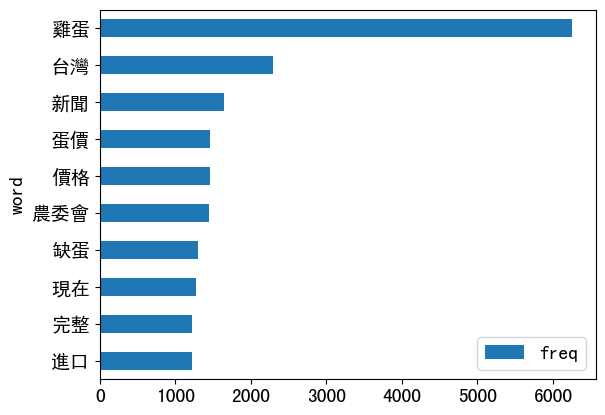

In [12]:
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.8 更新停用字字典

In [13]:
# 參數形式手動加入停用字
stopwords_manual = ["名稱","營業", "有沒有", "就是", "完整", "有無", "是否","現在", "如題", "剛來", "325", "署名","他會前","他家出"]
stopwords.extend(stopwords_manual)

In [14]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,好市多
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,雞蛋
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,去年
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,漲過
0,1,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,[問卦]雞蛋漲太兇了吧,2022-12-01 15:06:50,indoman,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ghgn"", ""cmtC...",223.138.146.139,2022-12-02 01:31:21,ptt,一次
...,...,...,...,...,...,...,...,...,...,...,...
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,記者
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,林莉
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,攝影
44955,2771,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,[新聞]進口蛋到Day2!直擊傳統市場「國產蛋」量,2023-03-30 21:59:15,ntupeap,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""uohZemllac"",...",223.140.57.94,2023-03-31 01:38:15,ptt,陳建銘


#### 重新計算詞頻

In [15]:
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,雞蛋,6254
1,台灣,2297
2,新聞,1648
3,蛋價,1464
4,價格,1459
...,...,...
30242,Sydney,1
30243,炒給,1
30244,炒肉,1
30245,壁癌,1


#### 重新繪製詞頻長條圖

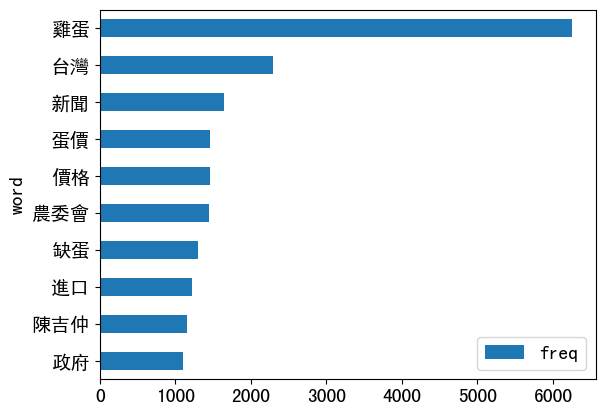

In [16]:
freq_df_2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

### 2.9 繪製文字雲
在2.4已使用新的斷詞字典

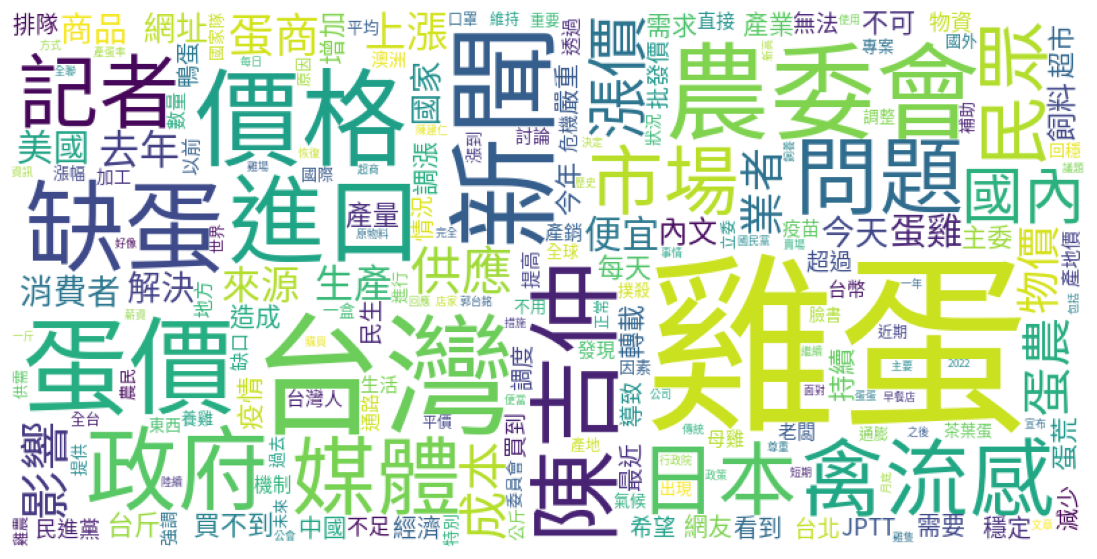

In [17]:
# 詞頻變成dict
freq_dict = freq_df_2.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()

# 儲存並顯示文字雲
plt.savefig('pic/wordcloud.png', bbox_inches='tight')

從2022/12/01-2023/3/12 <br>
主要原因:禽流感導致蛋雞大量撲殺，供給不足，造成蛋價上漲。<br>
次要原因:受疫情影響，國際飼料上漲，導致養雞成本上升，近一步推動蛋價上漲。<br>
新聞媒體將缺蛋問題歸咎在農委會、陳吉仲主委跟台灣政府上面<br>
台灣政府擬透過從日本與美國進口雞蛋試圖平穩台灣蛋價
(新聞好像是美日也缺蛋)

儲存clean data，以便後續其他使用

In [18]:
noStop_df_2.to_csv("raw_data/clean_egg_1201_0331_data.csv", encoding = 'utf-8',index = False)

## 3. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
>  就英文版的LIWC2007來說，目前包含了64個定義類別。這些類別包括基本的語文向度類別，例如： 22個語文特性類別（如，代名詞、冠詞等百分比）、3個副語言學（paralinguistic）類別（如應和詞、停頓詞等）。除了已經有具有明確定義的語文類別之外，LIWC也另外包含了32個心理特性類別（如，情感詞、認知詞等）、7個個人化類別（如工作、休閒活動等）。再加上程式自動計算出的6個一般描述性類別（總詞數、每句詞數等）以及12個標點符號類別（如句點、逗點等），總計可輸出80個字詞類別。
- https://cliwc.weebly.com/liwc20073542220856.html 
- https://cliwc.weebly.com/35422208563900621029200131228933521259913549826126.html

In [19]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [20]:
liwc_dict['sentiments'].value_counts()

affect      2061
negative    1172
positive     730
anger        358
sad          192
anx          169
Name: sentiments, dtype: int64

In [21]:
ptt_df = noStop_df_2.copy()
ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])

In [22]:
ptt_df["artDate"].describe(datetime_is_numeric=True)

count                           221542
mean     2023-02-19 10:34:46.837787136
min                2022-12-01 15:06:50
25%                2023-02-11 18:29:59
50%                2023-02-24 15:34:46
75%                2023-03-13 19:02:53
max                2023-03-30 21:59:15
Name: artDate, dtype: object

In [23]:
ptt_df["artDate"] = ptt_df["artDate"].dt.date

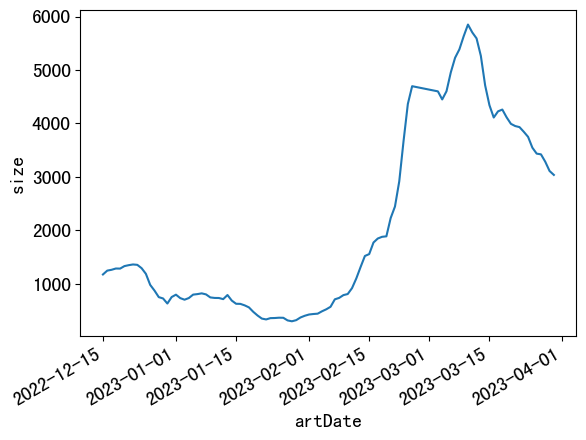

In [24]:
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size()

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel('size')
fig.autofmt_xdate()
plt.show()

從2/15開始雞蛋議題討論開始熱絡

### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。。

In [25]:
ptt_liwc_df = pd.merge(ptt_df[["artDate", "artUrl", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,好市多,NaN
1,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,雞蛋,NaN
2,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,去年,NaN
3,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,漲過,NaN
4,2022-12-01,https://www.ptt.cc/bbs/Gossiping/M.1669878412....,一次,NaN
...,...,...,...,...
236353,2023-03-30,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,記者,NaN
236354,2023-03-30,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,林莉,NaN
236355,2023-03-30,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,攝影,NaN
236356,2023-03-30,https://www.ptt.cc/bbs/Gossiping/M.1680184757....,陳建銘,NaN


### 3.3 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [26]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2022-12-01,affect,34
1,2022-12-01,anger,7
2,2022-12-01,anx,5
3,2022-12-01,negative,17
4,2022-12-01,positive,15
...,...,...,...
727,2023-03-30,anger,18
728,2023-03-30,anx,11
729,2023-03-30,negative,60
730,2023-03-30,positive,30


In [27]:
sentiment_count["sentiments"] == "positive"

0      False
1      False
2      False
3      False
4       True
       ...  
727    False
728    False
729    False
730     True
732    False
Name: sentiments, Length: 733, dtype: bool

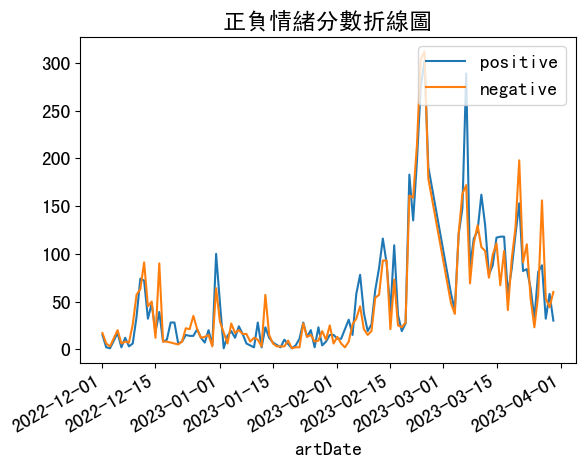

In [28]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖")  # 記得加上才能顯示中文
plt.show()

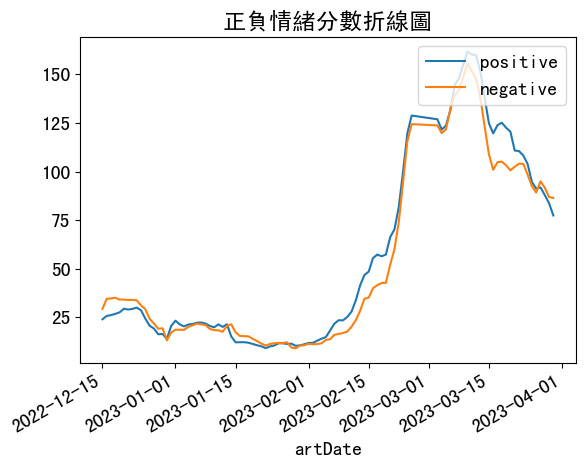

In [29]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天移動平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖")  # 記得加上才能顯示中文
plt.show()

### 3.4 正負向情緒分數比例折線圖圖

In [30]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
0,2022-12-01,affect,34,0.061706
1,2022-12-01,anger,7,0.012704
2,2022-12-01,anx,5,0.009074
3,2022-12-01,negative,17,0.030853
4,2022-12-01,positive,15,0.027223
...,...,...,...,...
727,2023-03-30,anger,18,0.007214
728,2023-03-30,anx,11,0.004409
729,2023-03-30,negative,60,0.024048
730,2023-03-30,positive,30,0.012024


In [31]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

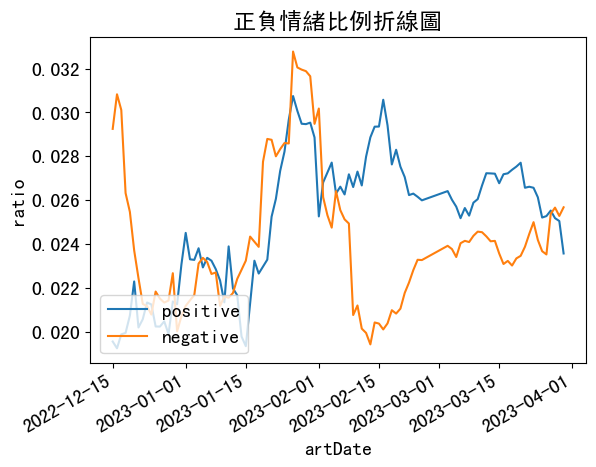

In [32]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖")

1.找3/1-3/12 發生甚麼事 情緒分數下降嚴重 <br>
行政院長陳建仁2/22表示，預估缺蛋3月初就會有所緩解，但馬上被強力抨擊，甚至多數人為4、5月不缺蛋就不錯，也導致大約從2/22負面字不斷急遽上升<br>
2.找2/15 (從IP找為甚麼正負情緒相差這麼大) 之後再做即可。<br>
Q2 2/15 可能原因 <br>
1.可能因為農委會說蛋價回穩 <br>
2.疫後特別條例 改善雞蛋跟蛋商設備 <br>

### 3.5 文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [33]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
527,2023-02-24,positive,302,0.026671
569,2023-03-07,positive,289,0.037778
520,2023-02-23,positive,275,0.022724
513,2023-02-22,positive,197,0.024306
534,2023-02-25,positive,191,0.026932


#### 2023-02-24 文字雲
2023-02-24 是正面詞彙次數最高的一天。我們可以用文字雲來觀察，八卦版在這天最常出現的正面情緒字有哪些。

In [34]:
date = "2023-02-24"
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\493727543.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))


[('雞蛋', 362),
 ('問題', 180),
 ('缺蛋', 136),
 ('解決', 98),
 ('農委會', 91),
 ('陳吉仲', 91),
 ('禽流感', 82),
 ('政府', 77),
 ('台灣', 75),
 ('進口', 74),
 ('新聞', 68),
 ('供應', 58),
 ('嚴重', 54),
 ('蛋價', 49),
 ('蛋農', 48),
 ('價格', 46),
 ('國內', 46),
 ('民眾', 46),
 ('不足', 45),
 ('記者', 43)]

(-0.5, 799.5, 399.5, -0.5)

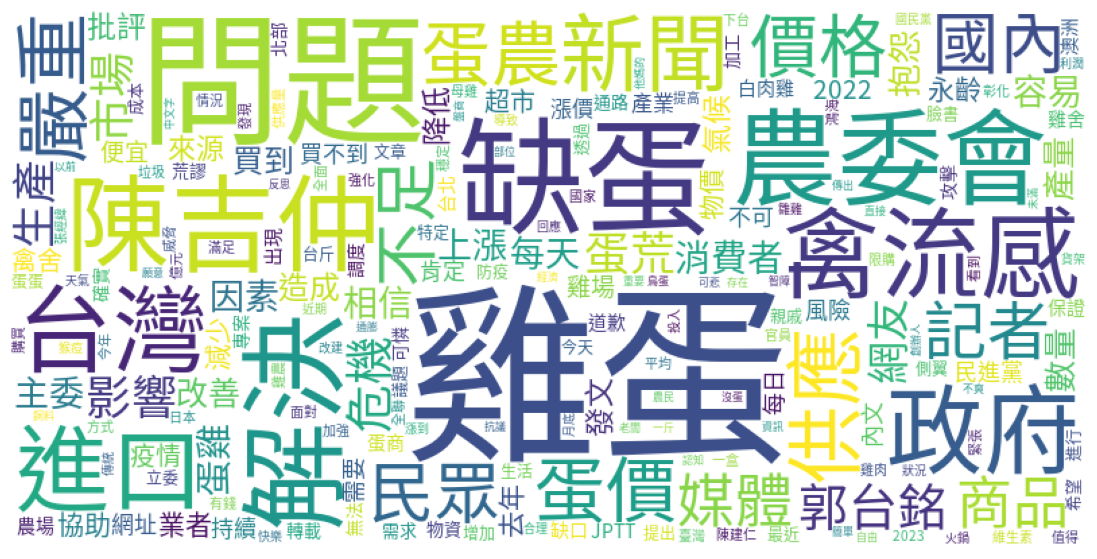

In [35]:
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1730698171.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (


(-0.5, 799.5, 399.5, -0.5)

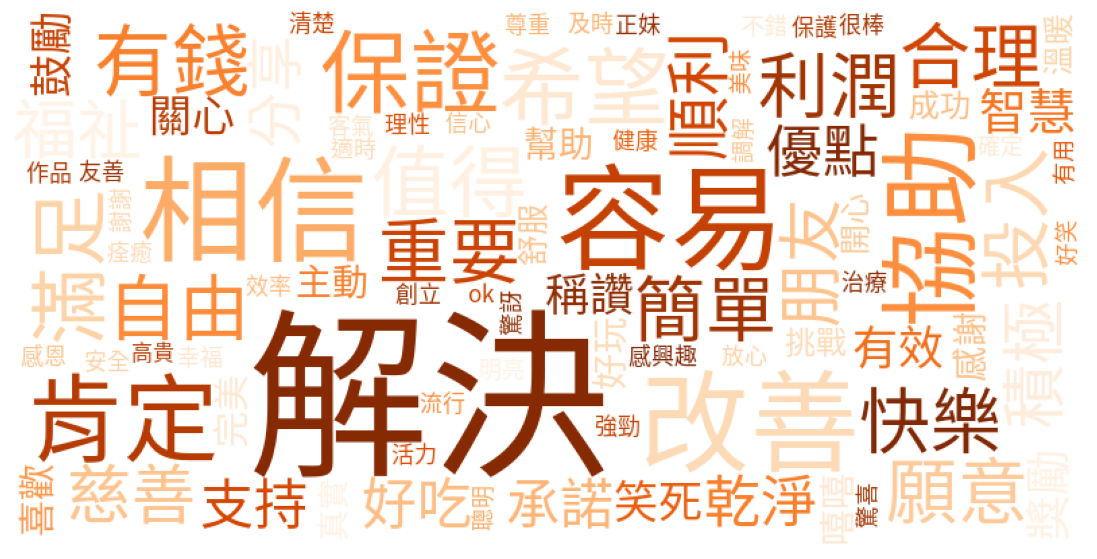

In [36]:
date = "2023-02-24"
mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "positive"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="Oranges")
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200, colormap="Oranges")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\3678388086.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (


(-0.5, 799.5, 399.5, -0.5)

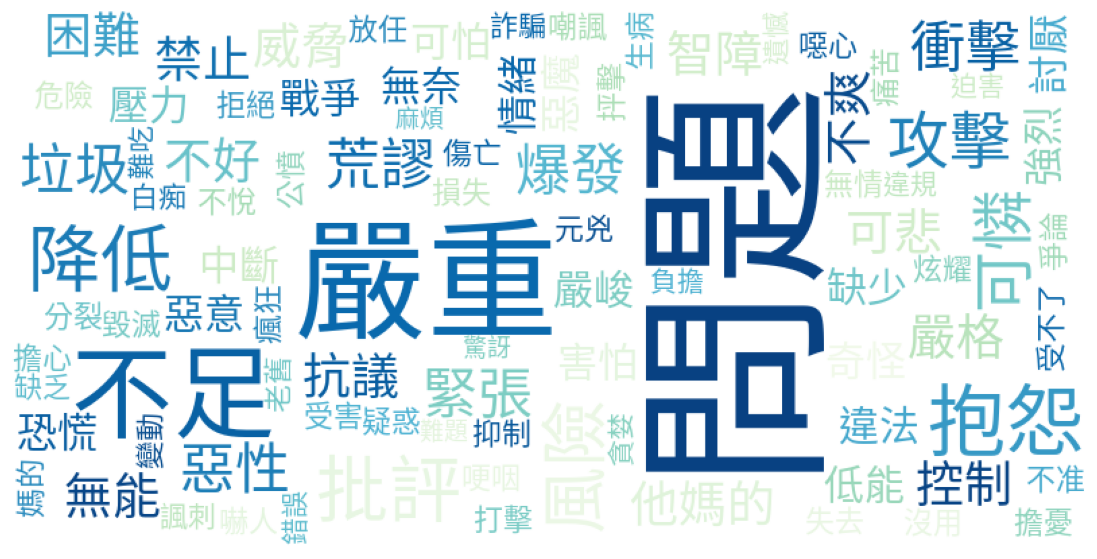

In [37]:
date = "2023-02-24"
mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "negative"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
# cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="GnBu")
# cloud.generate_from_frequencies(wc)

cloud = WordCloud(background_color='white',width=800, height = 400, font_path=font_path, max_words=200, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize = (14,7))
# plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud)
plt.axis("off")
# plt.show()

### 3.6 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [38]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
442,問題,negative,958
441,問題,affect,958
1762,解決,affect,457
1763,解決,positive,457
487,嚴重,negative,325
...,...,...,...
1161,機靈,positive,1
1165,欣喜,affect,1
1166,欣喜,positive,1
1169,欺詐,affect,1


In [39]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos

,word,sentiments,size
1763,解決,positive,457
667,希望,positive,246
1928,重要,positive,171
1232,決定,positive,145
645,尊重,positive,137
...,...,...,...
1152,榮譽,positive,1
1156,樂意,positive,1
1161,機靈,positive,1
1166,欣喜,positive,1


In [40]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg

,word,sentiments,size
442,問題,negative,958
487,嚴重,negative,325
64,不足,negative,234
917,戰爭,negative,123
1956,降低,negative,120
...,...,...,...
1229,氣憤,negative,1
1174,欺騙,negative,1
1170,欺詐,negative,1
1111,暴怒,negative,1


In [41]:
word_of_neg.sort_values(
    ["size"], ascending=False
)

,word,sentiments,size
442,問題,negative,958
487,嚴重,negative,325
64,不足,negative,234
917,戰爭,negative,123
1956,降低,negative,120
...,...,...,...
419,哀愁,negative,1
618,害羞,negative,1
559,奇異,negative,1
553,失眠,negative,1


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1433489422.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"])
C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1433489422.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"])


Text(0.5, 1.0, '負向情緒總數')

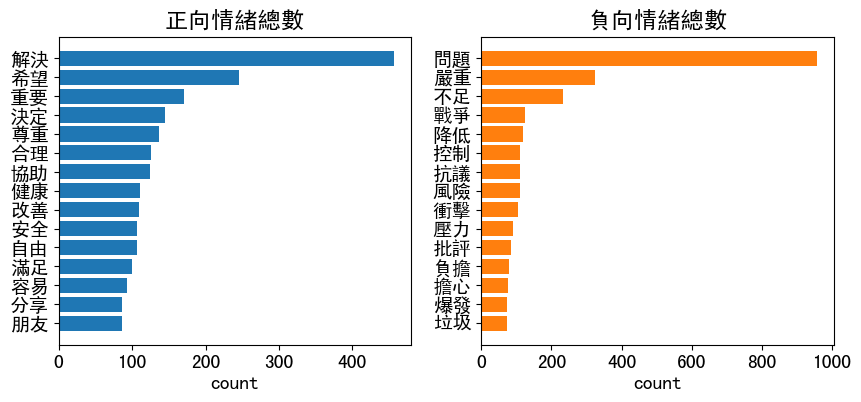

In [42]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"])
ax[0].set_title("正向情緒總數")

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"])
ax[1].set_title("負向情緒總數")

另外，也可以依據不同日期觀察情緒代表字的變化
#### 2023-02-24 正負情緒代表字

In [43]:
sentiment_count[sentiment_count["sentiments"] == "negative"].sort_values('size', ascending=False)

,artDate,sentiments,size,ratio
526,2023-02-24,negative,312,0.027555
519,2023-02-23,negative,304,0.025120
512,2023-02-22,negative,214,0.026403
666,2023-03-21,negative,198,0.028266
533,2023-02-25,negative,179,0.025240
...,...,...,...,...
15,2022-12-03,negative,3,0.073171
311,2023-01-22,negative,2,0.006192
306,2023-01-21,negative,2,0.018349
383,2023-02-03,negative,2,0.016260


In [44]:
date = '2023-02-24'
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"].isin(['positive', 'negative'])
)

ptt_df_date = ptt_liwc_df.loc[mask, ["artDate", "word", "sentiments"]]
ptt_df_date_senti = ptt_df_date.groupby(["sentiments", "word"], as_index=False).size()
ptt_df_date_senti.head()

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\3156116361.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date)) & (


,sentiments,word,size
0,negative,不准,1
1,negative,不好,3
2,negative,不悅,1
3,negative,不爽,3
4,negative,不足,15


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1670547556.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"])
C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1670547556.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"])


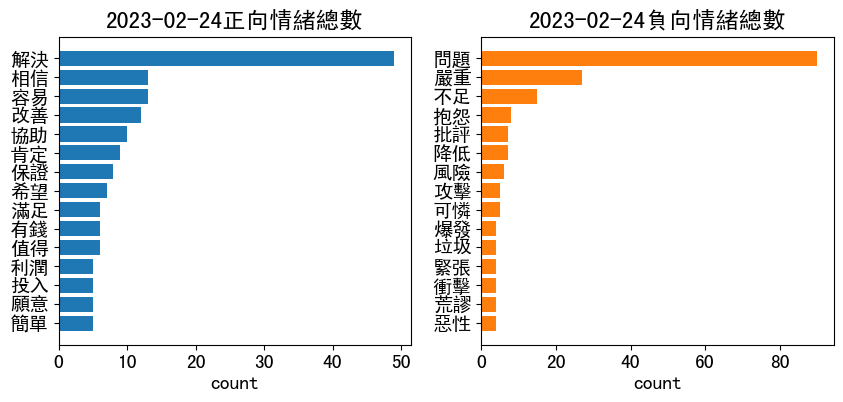

In [45]:
pos = ptt_df_date_senti[(ptt_df_date_senti["sentiments"] == "positive")].sort_values(
    ["size"], ascending=True
)
pos = pos[-15:]
neg = ptt_df_date_senti[ptt_df_date_senti["sentiments"] == "negative"].sort_values(
    ["size"], ascending=True
)
neg = neg[-15:]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_title(f"{date}正向情緒總數")
ax[0].set_yticklabels(pos["word"])

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_title(f"{date}負向情緒總數")
ax[1].set_yticklabels(neg["word"])
plt.show()

### 3.7 每日情緒分數趨勢

In [46]:
sentiment_count

,artDate,sentiments,size,ratio
0,2022-12-01,affect,34,0.061706
1,2022-12-01,anger,7,0.012704
2,2022-12-01,anx,5,0.009074
3,2022-12-01,negative,17,0.030853
4,2022-12-01,positive,15,0.027223
...,...,...,...,...
727,2023-03-30,anger,18,0.007214
728,2023-03-30,anx,11,0.004409
729,2023-03-30,negative,60,0.024048
730,2023-03-30,positive,30,0.012024


In [47]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad
0,2022-12-01,34,7,5,17,15,2
1,2022-12-02,8,1,0,6,2,1
2,2022-12-03,4,3,0,3,1,0
3,2022-12-05,40,7,3,20,17,2
4,2022-12-06,8,1,0,6,2,1


In [48]:
# sentiment 計算方式: positive - anger - anx - negative - sad
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["anger"]
    - ptt_sentiment_value["anx"]
    - ptt_sentiment_value["negative"]
    - ptt_sentiment_value["sad"]
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
0,2022-12-01,34,7,5,17,15,2,-16
1,2022-12-02,8,1,0,6,2,1,-6
2,2022-12-03,4,3,0,3,1,0,-5
3,2022-12-05,40,7,3,20,17,2,-15
4,2022-12-06,8,1,0,6,2,1,-6


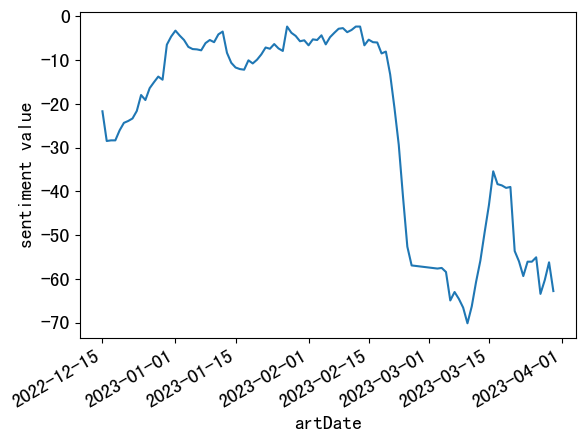

In [49]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()

可以從圖片中看出以下 <br>
1. 情緒分數總和都是負數 <Br>
2. 禽流感高峰大約在每年的12~2月 導致12月開始多為負面<Br>
3. 12月中有回升原因： 陳吉仲保證雞蛋供應無虞。<Br>
4. 從新聞可得知，原訂二月底或三月初蛋價及產量會回穩，但當時間到時，民眾卻沒感覺到成效．並認為政策效果有待討論，因而導致負面情緒急速增加。<Br>

## 4. lexicon-base 情緒分析2

引入所需套件

In [50]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import configparser, re, os, io
from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

### 4.1 CKIP 安裝

In [51]:
data_utils.download_data_gdown("./") # gdrive-ckip # 下載ckip model

Downloading...
From (uriginal): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=b5c89cbf-5839-4de0-8e39-803028faa342
To: c:\Users\collin\Desktop\社群媒體\讀書會報告\data.zip
100%|██████████| 1.88G/1.88G [00:51<00:00, 36.6MB/s]


In [52]:
# 將三份工具的模型路徑指向我們剛才下載的 data.zip
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

c:\Users\collin\anaconda3\envs\social_media\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\collin\anaconda3\envs\social_media\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\collin\anaconda3\envs\social_media\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell =

定義文字清理相關function

In [53]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    final_res = []
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    
#     paragraphs = list(filter(None, article.split("\n")))
    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
#     print(len(paragraphs))
#     print(paragraphs)
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            _logger.info("error")
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

In [54]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(2, {'吉仲': 100.0}), (3, {'陳吉仲': 100.0, '好市多': 100.0, '好事多': 200.0, '產蛋率': 500.0})]


In [55]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
#     print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id,word,pos]) 
#         print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
#     print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3],entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    for index, row in data_df.iterrows(): # document level    
#         print(f"\ndocument {index}") 

        # clean data
        result = [] 
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2) # set dictionary 
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        for i, sentence in enumerate(flat_list): # sentence level
#             print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'],sentence])            
            temp_tokens = get_pos(row['system_id'],word_sentence_list[i],  pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'],entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [56]:
# 看看tmp和flat_list有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['如題'], ['剛來好市多買雞蛋'], ['去年買'], ['後來漲過次'], ['剛才去買變']]
['如題', '剛來好市多買雞蛋', '去年買', '後來漲過次', '剛才去買變']


In [57]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 1240.9261202812195


In [58]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,如,P
1,1,題,Na
2,1,剛,D
3,1,來,VA
4,1,好市多,Nb


In [59]:
entity_table.head() # word entity 列表

,system_id,word,ner
0,1,好市多,ORG
1,1,去年,DATE
2,1,石安牧場,FAC
3,2,日本,GPE
4,2,日本,NORP


In [60]:
sentence_table.head()

,system_id,sentence
0,1,如題
1,1,剛來好市多買雞蛋
2,1,去年買
3,1,後來漲過次
4,1,剛才去買變


In [61]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 2771
posts have NER: 2431


In [62]:
# 將文章存成csv
pos_table.to_csv('raw_data/pos_table_egg.csv', index = False)
entity_table.to_csv('raw_data/entity_table_egg.csv', index = False)
sentence_table.to_csv('raw_data/sentence_table_egg.csv', index = False)

### 4.2 探索分析 - NER

將剛才分析的資料匯入

In [63]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("raw_data/pos_table_egg.csv") 
entity_table = pd.read_csv("raw_data/entity_table_egg.csv") 
sentence_table = pd.read_csv("raw_data/sentence_table_egg.csv") 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [64]:
entity_table['ner'].unique()

array(['ORG', 'DATE', 'FAC', 'GPE', 'NORP', 'MONEY', 'PERSON', 'ORDINAL',
       'QUANTITY', 'TIME', 'CARDINAL', 'LOC', 'EVENT', 'WORK_OF_ART',
       'LANGUAGE', 'PRODUCT', 'PERCENT', 'LAW'], dtype=object)

In [65]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(8)
ner_count

,ner,count
4,GPE,6966
13,PERSON,6759
11,ORG,5482
1,DATE,4720
0,CARDINAL,2550
9,NORP,1146
8,MONEY,898
16,TIME,555


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\3390866936.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


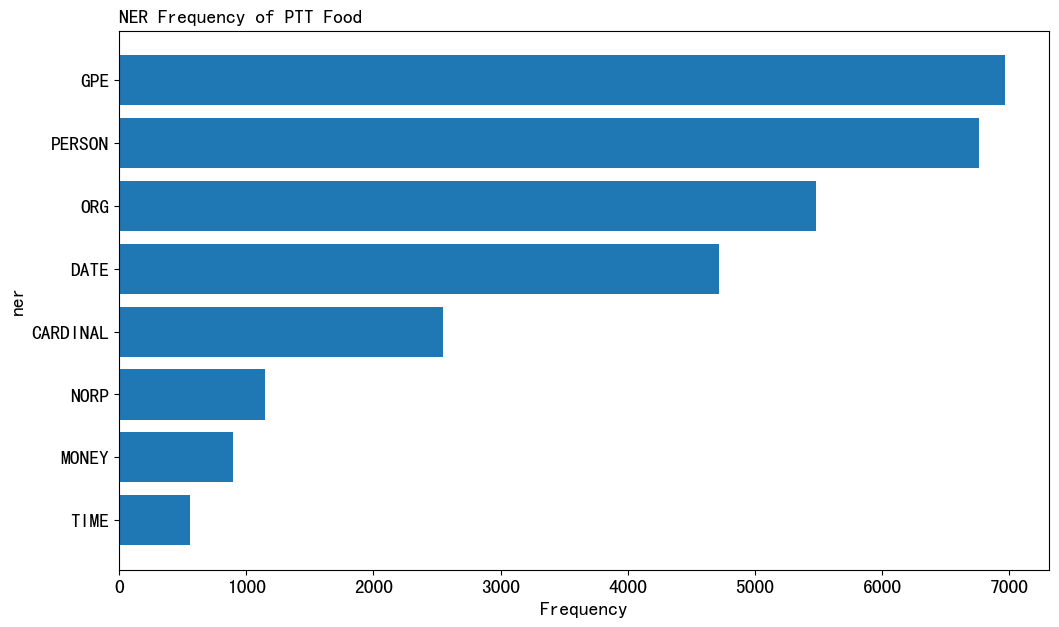

In [66]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Food',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的人名(PERSON)

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\2044175467.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


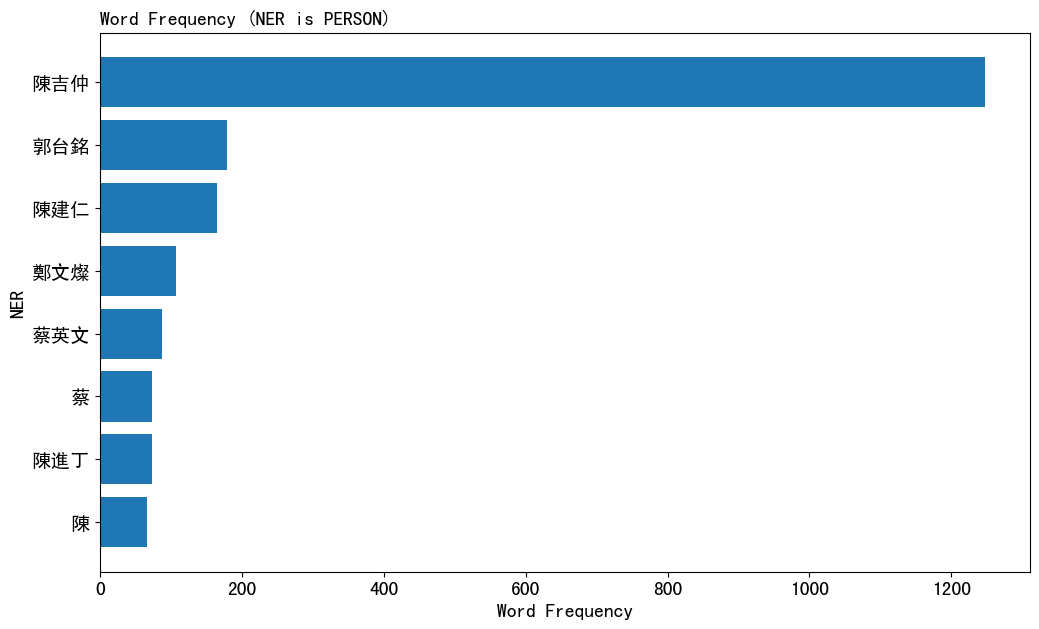

In [67]:
# 篩選ner為名詞的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的組織(ORG)

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\3690618897.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


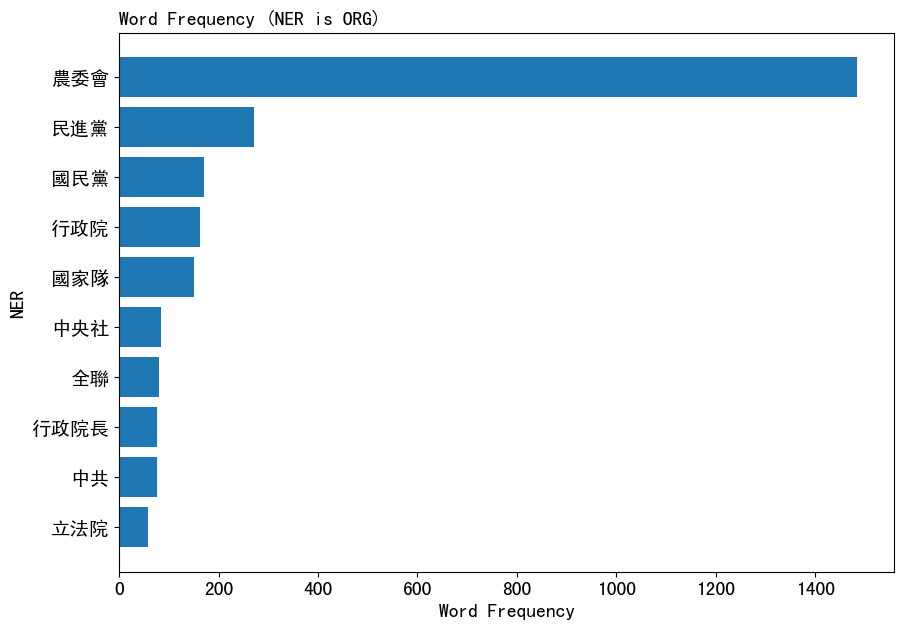

In [68]:
# 篩選ner為名詞的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1258504230.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


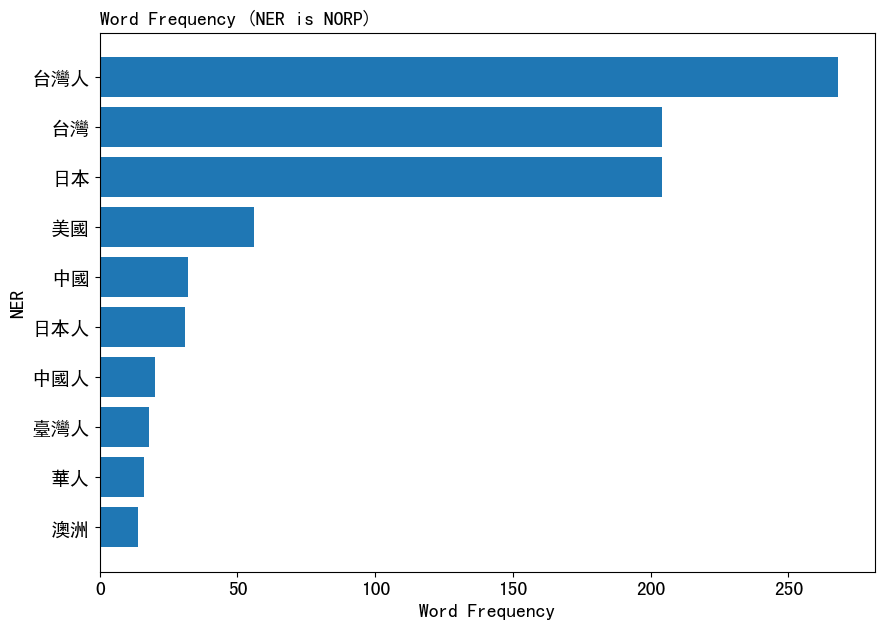

In [69]:
# 篩選ner為名詞的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

In [70]:
keyword_list = ['缺蛋']
thailand_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{thailand_selected.shape[0]}篇相關貼文")
thailand_selected.head(3)

缺蛋：759篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
22,23,https://www.ptt.cc/bbs/Gossiping/M.1670516100....,[新聞]高病原H5N1禽流感擴大！新增兩鴨場中鏢,2022-12-09 00:14:58,NEDYA,Gossiping,高病原H5N1禽流感擴大！新增兩鴨場中鏢 農委會：疫情比往年嚴峻\nhttps://www....,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""bill403777"",...",1.173.231.148,2022-12-09 01:37:26,ptt
87,88,https://www.ptt.cc/bbs/Gossiping/M.1670817107....,Re:[新聞]逛日本驚「1顆蛋5元」！辛酸對比網嘆：人,2022-12-12 11:51:43,onionandy,Gossiping,為何蛋比別人貴對吧\n而且比起肉雞的緩漲是全世界都有的現象（主要來自飼料漲價）\n台灣蛋價突...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""su4vu6"", ""cm...",126.234.186.251,2022-12-13 01:27:17,ptt
196,197,https://www.ptt.cc/bbs/Gossiping/M.1671234001....,[新聞]蛋荒恐重演？農委會：天冷需求增,2022-12-17 07:39:52,SuperSg,Gossiping,1.媒體來源:聯合報\n2.記者署名:彭宣雅\n3.完整新聞標題:蛋荒恐重演？農委會：天冷需...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""takechance"",...",114.32.239.143,2022-12-18 01:26:25,ptt


### 4.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [71]:
pos_table['pos'].unique()

array(['P', 'Na', 'D', 'VA', 'Nb', 'VC', 'Nd', 'VH', 'Di', 'Nes', 'T',
       'Dfa', 'Cbb', 'DE', 'V_2', 'Nc', 'Nf', 'Nep', 'Nh', 'VE', 'SHI',
       'FW', 'Neu', 'Neqa', 'Da', 'VG', 'VD', 'Cba', 'Caa',
       'COMMACATEGORY', 'VCL', 'Nv', 'VB', 'VF', 'VJ', 'Ng', 'VHC', 'Ncd',
       'VK', 'VL', 'Cab', 'VI', 'A', 'Dk', 'VAC', 'I', 'DM', 'Neqb',
       'PARENTHESISCATEGORY', 'Dfb', 'PERIODCATEGORY', 'COLONCATEGORY',
       'ETCCATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [72]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
16,Na,113043
5,D,55161
36,VC,39234
42,VH,29775
18,Nc,23952
30,P,16319
6,DE,16286
39,VE,14636
26,Nf,13330
20,Nd,10789


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\2478466374.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


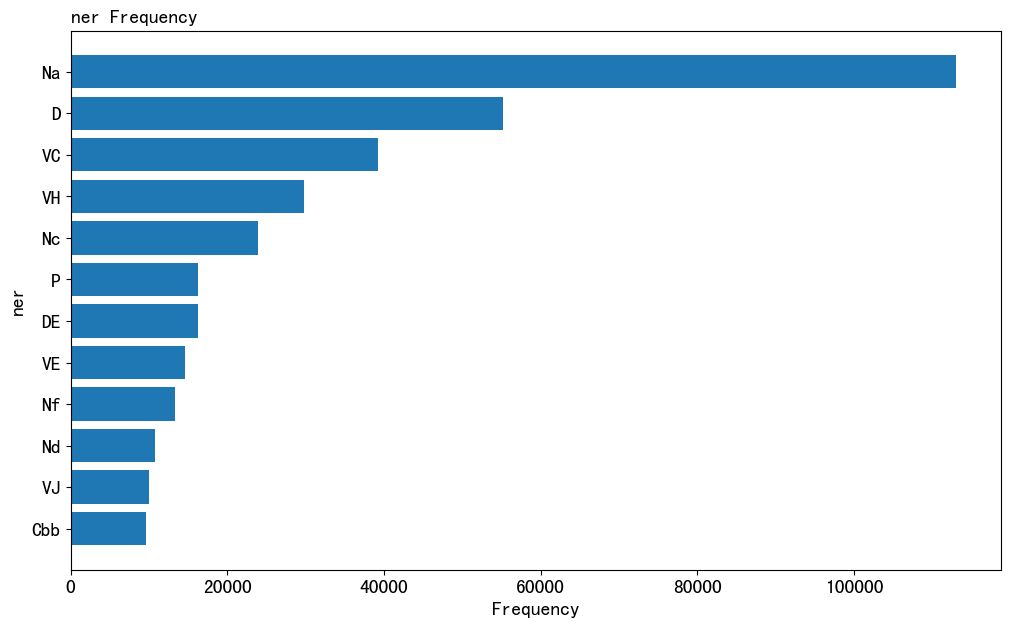

In [73]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

#### POS 常見詞性列表
+ 中研院列表: https://ckip.iis.sinica.edu.tw/service/corenlp/
    + Na: 普通名詞
    + D: 副詞
    + VC: 動作及物動詞
    + Nb: 專有名詞
    + FW: 外文
    + VH: 狀態不及物動詞
    + Nh: 代名詞
    + DE: 的之得地
    + P: 介詞
    + VA: 動作不及物動詞
    + T: 語助詞
    + SHI: 是

### 涉及到的名詞(Noun)
+ 我們可以找出談論吃到飽時大部分討論到的專有名詞，探索大家的關注焦點。
+ 名詞可以分為「Na: 普通名詞」、「Nb: 專有名詞」等

In [74]:
# 篩選pos為名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
1958,陳吉仲,1252
1056,民進黨,276
1787,郭台銘,179
362,國民黨,179
1974,陳建仁,166
146,全聯,141
1064,永齡,123
1833,鄭文燦,108
1539,蔡英文,87
32,中共,82


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\502700507.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


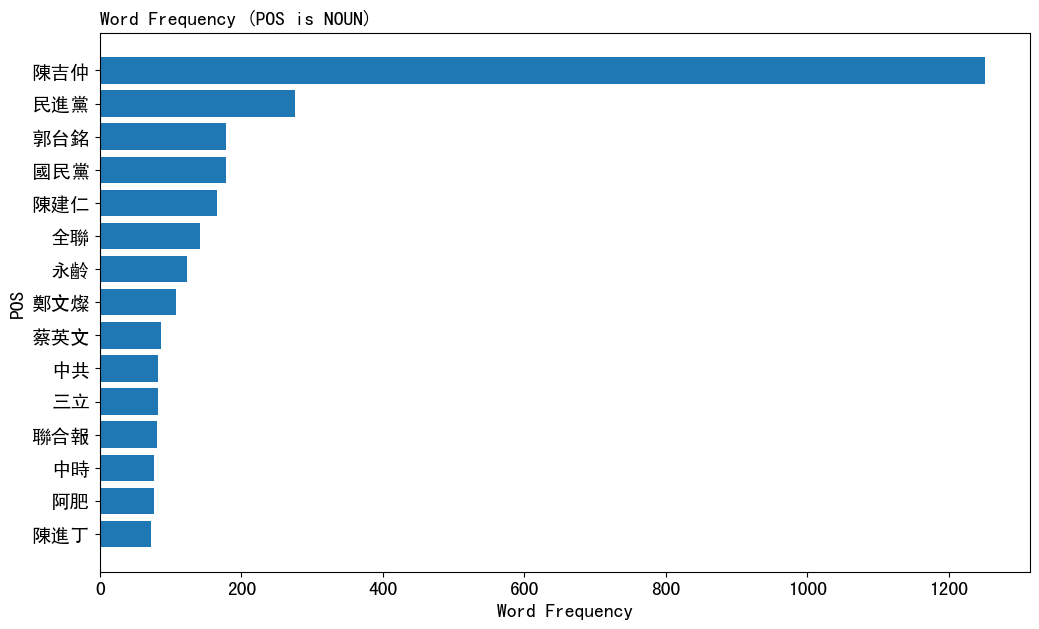

In [75]:
# 設定中文字形
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

### 涉及到的動詞(VERB)
+ 我們可以找出談論吃到飽時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [76]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
2827,進口,1311
2817,連結,504
2457,解決,489
867,影響,437
2265,署名,428
2543,調漲,365
2753,轉載,350
1971,生產,303
2611,買到,276
1321,提高,254


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\1955970811.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


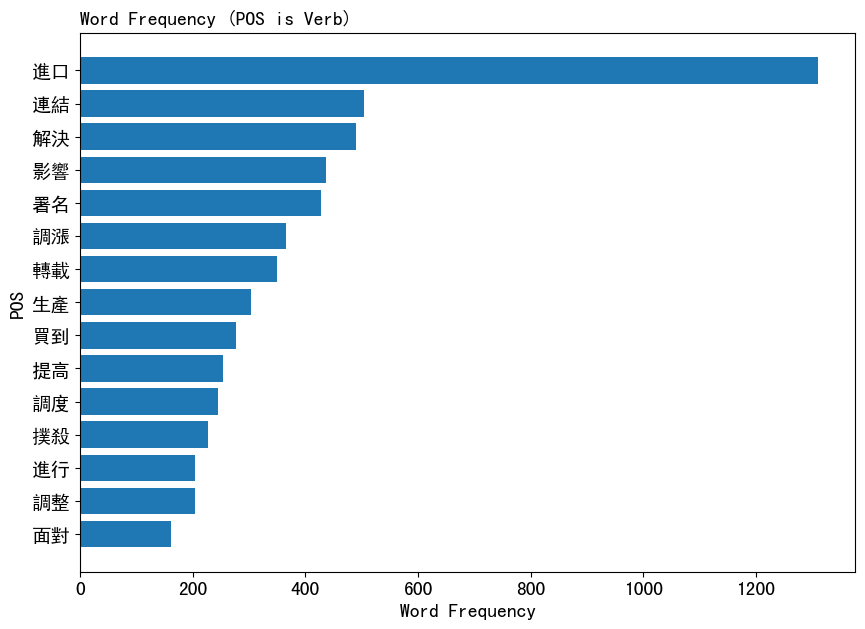

In [77]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is Verb)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

## 5. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [78]:
from snownlp import SnowNLP
s = SnowNLP('文華訂位都訂不到')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.04180028804608915

In [79]:
sentence_table = pd.read_csv("raw_data/sentence_table_egg.csv") #匯資料

sentiment_date = pd.merge(sentence_table,thailand_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head()

,system_id,sentence,artDate,dataSource
623,23,高病原禽流感擴大,2022-12-09 00:14:58,ptt
624,23,新增兩鴨場中鏢農委會疫情比往年嚴峻,2022-12-09 00:14:58,ptt
625,23,/////,2022-12-09 00:14:58,ptt
626,23,上下游,2022-12-09 00:14:58,ptt
627,23,記者孫維揚上下游記者林怡均,2022-12-09 00:14:58,ptt


In [80]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head()

,system_id,sentence,artDate,dataSource,sentimentValue
623,23,高病原禽流感擴大,2022-12-09 00:14:58,ptt,0.752094
624,23,新增兩鴨場中鏢農委會疫情比往年嚴峻,2022-12-09 00:14:58,ptt,0.542092
625,23,/////,2022-12-09 00:14:58,ptt,0.500000
626,23,上下游,2022-12-09 00:14:58,ptt,0.500000
627,23,記者孫維揚上下游記者林怡均,2022-12-09 00:14:58,ptt,0.428207


In [81]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    1.875300e+04
mean     3.454709e-01
std      3.063918e-01
min      1.004850e-10
25%      5.965618e-02
50%      2.610552e-01
75%      5.606628e-01
max      9.999945e-01
Name: sentimentValue, dtype: float64

<Axes: >

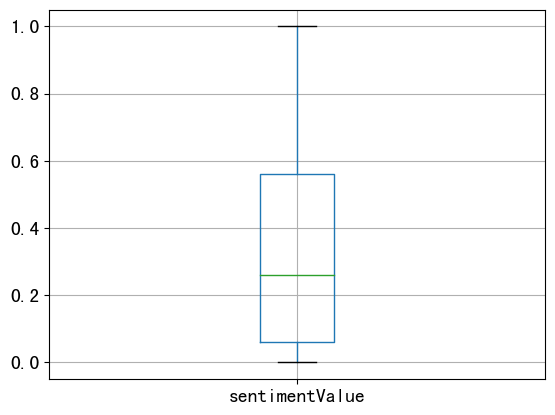

In [82]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

In [83]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count.head()

,artDate,sentimentValue
0,2022-12,0.323118
1,2023-01,0.345476
2,2023-02,0.339845
3,2023-03,0.350558


C:\Users\collin\AppData\Local\Temp\ipykernel_31132\2520951907.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


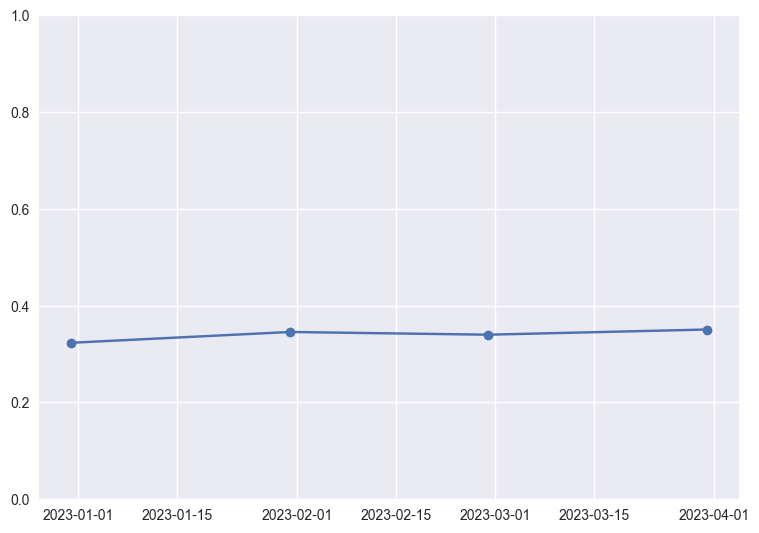

In [84]:
plt.style.use('seaborn')

months = sentiment_count['artDate']
y = sentiment_count['sentimentValue']

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate
plt.tight_layout()
plt.ylim(0,1)

plt.show()

### 詞彙探索
從上圖中可以發現 2022年3月的情緒分數相對高，我們把這個月的正面句子挑出來看看他們都用甚麼詞。

In [85]:
filter_sentiment = sent_date[sent_date['artDate']=='2023-03']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head()

,system_id,sentence,artDate,dataSource,sentimentValue
28907,1555,記者署名,2023-03,ptt,0.729795
28911,1555,陳吉仲中國有打疫苗不考慮,2023-03,ptt,0.993571
28915,1555,陳吉仲表示，符合食藥署規範的就是日本美澳等國，而像越南,2023-03,ptt,0.992134
28916,1555,中國等國，都有打疫苗完全沒考慮，是因防疫禽流感等考量下的決策,2023-03,ptt,0.999603
28919,1555,陳吉仲表示，符合食藥署規範能進口的蛋就是日本美澳等國，但,2023-03,ptt,0.988872


In [86]:
# 把時間分數和之前斷詞的token table做 join
neg_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
neg_words = neg_words[['system_id','sentimentValue','word']]
neg_words.head()

,system_id,sentimentValue,word
0,1555,0.729795,備註
1,1555,0.729795,請
2,1555,0.729795,放
3,1555,0.729795,最後
4,1555,0.729795,面違


In [87]:
# 篩選掉只有單個字元的結果
neg_words = neg_words[neg_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [88]:
# 自定停用字
with open('dict/stopwords.txt') as f:
    stop_words = f.read().splitlines()

print(stop_words)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一則', '一方面', '一旦', '一來', '一樣', '一般', '一轉眼', '萬一', '上', '上下', '下', '不', '不僅', '不但', '不光', '不單', '不只', '不外乎', '不如', '不妨', '不盡', '不盡然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不獨', '不管', '不至於', '不若', '不論', '不過', '不問', '與', '與其', '與其說', '與否', '與此同時', '且', '且不說', '且說', '兩者', '個', '個別', '臨', '為', '為了', '為什麼', '為何', '為止', '為此', '為著', '乃', '乃至', '乃至於', '麼', '之', '之一', '之所以', '之類', '烏乎', '乎', '乘', '也', '也好', '也罷', '了', '二來', '於', '於是', '於是乎', '云云', '云爾', '些', '亦', '人', '人們', '人家', '什麼', '什麼樣', '今', '介於', '仍', '仍舊', '從', '從此', '從而', '他', '他人', '他們', '以', '以上', '以為', '以便', '以免', '以及', '以故', '以期', '以來', '以至', '以至於', '以致', '們', '任', '任何', '任憑', '似的', '但', '但凡', '但是', '何', '何以', '何況', '何處', '何時', '余外', '作為', '你', '你們', '使', '使得', '例如', '依', '依據', '依照', '便於', '俺', '俺們', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '儻然', '像', '兒', '先不先', '光是', '全體', '全部', '

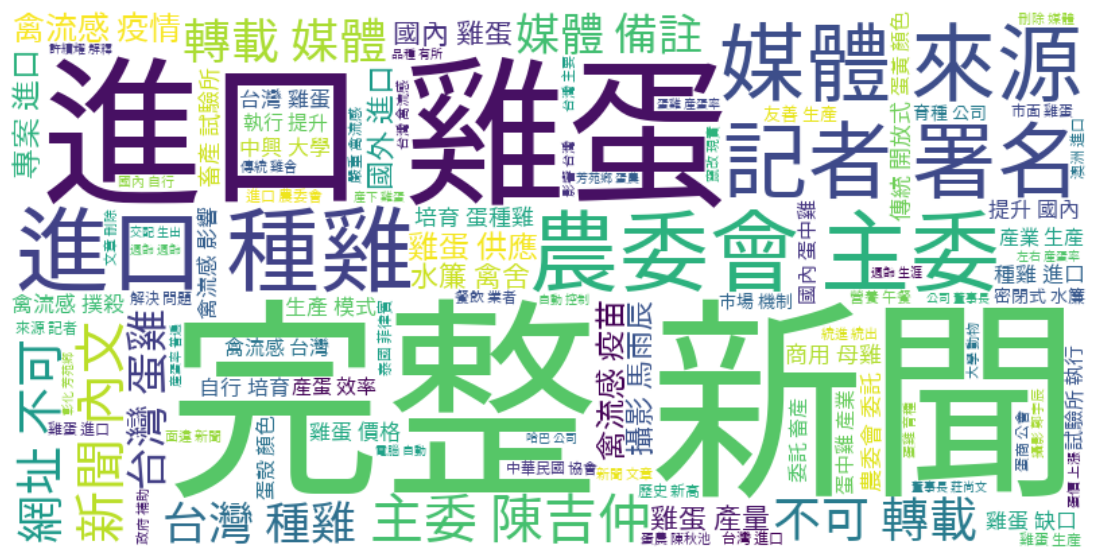

In [89]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','餐廳','覺得'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,font_path=font_path,width=800, height = 400, max_words=100, background_color="white")

wordcloud.generate(' '.join(neg_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()